# Reducing the footprints file size to only include hawkesbury area

# Installing packages

In [13]:
pip install git+https://github.com/spaceml-org/ml4floods#egg=ml4floods

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/spaceml-org/ml4floods to /tmp/pip-install-s73ytpw6/ml4floods_65c5207ef85d43dfb2383cf7fd28dbe3
  Running command git clone -q https://github.com/spaceml-org/ml4floods /tmp/pip-install-s73ytpw6/ml4floods_65c5207ef85d43dfb2383cf7fd28dbe3


In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import os
import geopandas as gpd
import numpy as np

# Loading in And Visualising Flood Map Data

In [16]:
map_file = '/content/drive/MyDrive/PACE_ML4Floods/Team Workspace/data_noSharing/0_DEV_1_Staging_operational_EMSR586_prepostflood_2022-06-26_2022-06-27_2022-07-17.geojson'

In [17]:
syd_map = gpd.read_file(map_file)

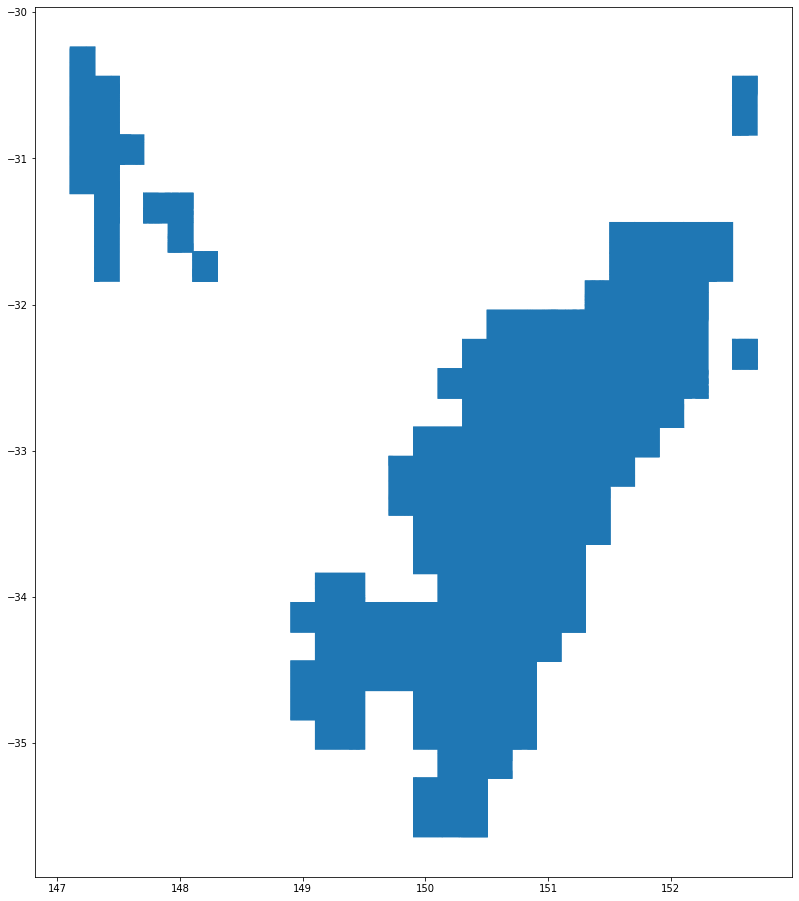

In [18]:
poly_map = syd_map.plot(figsize=(16, 16))

In [19]:
classes = syd_map['class'].unique()
print(classes)

['area_imaged' 'area_imaged-pre-flood' 'cloud' 'cloud-pre-flood'
 'flood-trace' 'water-post-flood' 'water-pre-flood']


In [20]:
syd_flood = syd_map.groupby('class').get_group('flood-trace')

flood_map = flood_trace.plot(figsize=(20, 20))

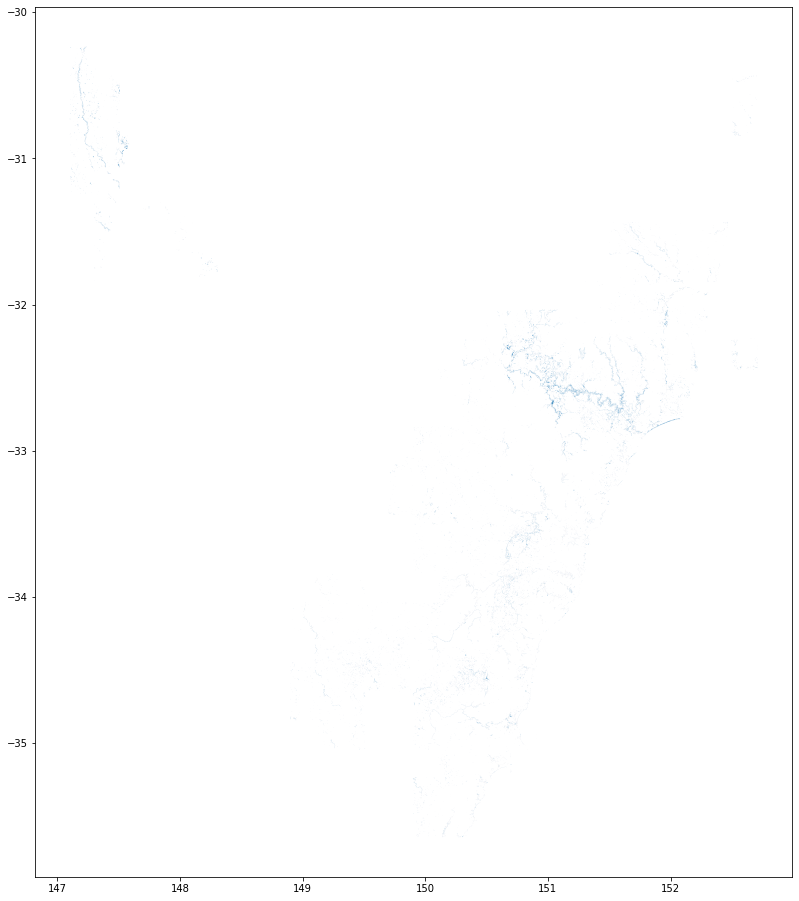

In [21]:
flood_map = syd_flood.plot(figsize=(16,16))

In [22]:
len(syd_flood)

25316

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


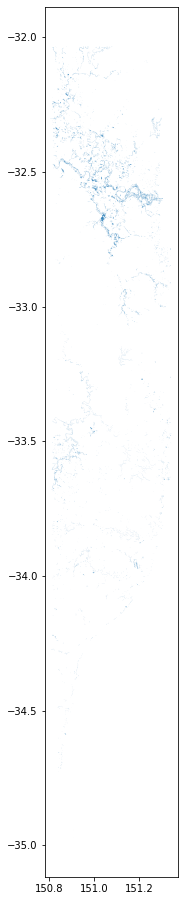

In [23]:
syd_flood[np.int(len(syd_flood)/2): np.int(len(syd_flood)*3/4)].plot(figsize= (16,16))

In [24]:
len(syd_flood)

25316

In [25]:
footprint_file = '/content/drive/MyDrive/PACE_ML4Floods/Team Workspace/data/syd_footprint.geojson'

In [26]:
syd_footprint = gpd.read_file(footprint_file)

In [27]:
syd_footprint.shape

(2659256, 1)

In [28]:
syd_flood.geometry

6902     POLYGON ((147.18755 -31.23805, 147.18776 -31.2...
6903     POLYGON ((147.18734 -31.23769, 147.18692 -31.2...
6904     POLYGON ((147.18849 -31.23733, 147.18815 -31.2...
6905     POLYGON ((147.11939 -31.22929, 147.11876 -31.2...
6906     POLYGON ((147.21324 -31.22087, 147.21366 -31.2...
                               ...                        
32213    POLYGON ((152.70007 -30.43711, 152.70028 -30.4...
32214    POLYGON ((152.66133 -30.43638, 152.66165 -30.4...
32215    POLYGON ((152.67258 -30.43632, 152.67279 -30.4...
32216    POLYGON ((152.69924 -30.43602, 152.69924 -30.4...
32217    POLYGON ((152.69727 -30.43475, 152.69758 -30.4...
Name: geometry, Length: 25316, dtype: geometry

In [29]:
syd_poly_idx = np.arange(0, 91125, 1, dtype=int)
# print(poly_idx)

syd_flood = syd_flood.reset_index(drop= True)

In [30]:
syd_flood.geometry[1]

KeyError: ignored

# Applying further boundaries to the Sydney map to the footprint file

We want to decrease the file size to maximum of 250Mb for GitHub.

In [ ]:
syd_flood.plot()

In [ ]:
syd_footprint

In [ ]:
xmin, ymin, xmax, ymax = np.array([150.8, -32.75, 151.2, -32.25 ])

syd_footprint_extended = syd_footprint.cx[xmin:xmax, ymin:ymax]

In [ ]:
syd_flood= syd_flood.cx[xmin:xmax, ymin:ymax]

In [ ]:
syd_flood.plot()

In [ ]:
syd_flood.to_file("/content/drive/MyDrive/PACE_ML4Floods/Team Workspace/data_noSharing/syd_flood_reduced.geojson", driver='GeoJSON')

In [ ]:
syd_footprint_extended.geometry

In [ ]:
syd_footprint_extended.to_file("/content/drive/MyDrive/PACE_ML4Floods/Team Workspace/data/syd_footprint_extended.geojson", driver='GeoJSON')

The decrease in Footprint file size/polygons is

In [ ]:
len(syd_footprint.geometry)

In [ ]:
len(syd_footprint_extended.geometry)

In [ ]:
len(syd_footprint.geometry) - len(syd_footprint_extended.geometry)